In [50]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
# opencv read image in BGR mode
# plt.imshow show image in RGB mode
def show_cv_img(cv_image):
    image = cv2.cvtColor(cv_image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

In [41]:
# 加载pgm图象
face_folder="/Users/sunq/data/att_faces/s1"
file_path= "/Users/sunq/data/att_faces/s5/10.pgm"
img=cv2.imread(file_path)

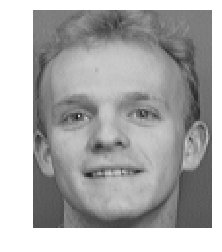

In [42]:
show_cv_img(img)

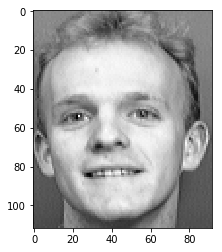

In [46]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap=plt.cm.gray)

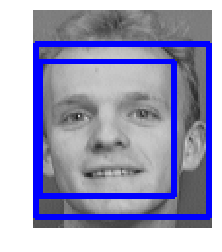

In [47]:
faces = face_detector.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
show_cv_img(img)

In [45]:
faces

()

In [16]:
cv2.imwrite("test1.jpg", gray_img[y:y+h,x:x+w])

True

In [21]:
data_folder="/Users/sunq/data/att_faces"
person_dirs=os.listdir(data_folder)

In [22]:
full_person_dirs=[]

In [23]:
for c in person_dirs:
    full_person_dirs.append(os.path.join(data_folder,c))

In [26]:
person_dir=full_person_dirs[0]

In [27]:
imgpaths=[]
for filename in os.listdir(person_dir):
    imgpaths.append(os.path.join(person_dir,filename))

In [28]:
imgpaths

['/Users/sunq/data/att_faces/s34/7.pgm',
 '/Users/sunq/data/att_faces/s34/6.pgm',
 '/Users/sunq/data/att_faces/s34/4.pgm',
 '/Users/sunq/data/att_faces/s34/5.pgm',
 '/Users/sunq/data/att_faces/s34/1.pgm',
 '/Users/sunq/data/att_faces/s34/2.pgm',
 '/Users/sunq/data/att_faces/s34/3.pgm',
 '/Users/sunq/data/att_faces/s34/8.pgm',
 '/Users/sunq/data/att_faces/s34/9.pgm',
 '/Users/sunq/data/att_faces/s34/10.pgm']

In [ ]:
def process_img(imgpath):
    img=cv2.imread(imgpath)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    d

In [52]:
PIL_img = Image.open(file_path).convert('L')

In [53]:
type(PIL_img)

PIL.Image.Image

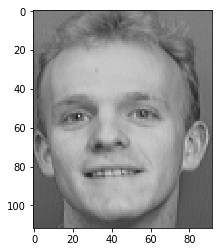

In [54]:
plt.imshow(PIL_img)

In [55]:
img_numpy = np.array(PIL_img,'uint8')

In [56]:
type(img_numpy)

numpy.ndarray

In [57]:
img_numpy.dtype

dtype('uint8')

In [58]:
img.dtype

dtype('uint8')

In [59]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
test_path="dataset/test"
img_paths = [os.path.join(test_path,f) for f in os.listdir(test_path)]
print("*****start******")


*****start******


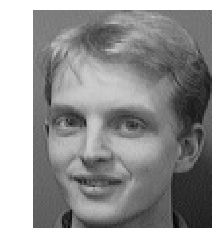

In [65]:
img_path=img_paths[0]
img = cv2.imread(img_path)
show_cv_img(img)

In [66]:
def predict(recognizer, imgpath):
    img = cv2.imread(imgpath)
    #img = cv2.flip(img, -1)  # Flip vertically

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # minW = gray.shape[1] * 0.1  # width
    # minH = gray.shape[0] * 0.1  # height

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
       # minSize=(int(minW), int(minH)),
    )

    ids=[]
    confidences=[]
    for (x, y, w, h) in faces:
        id, confidence = recognizer.predict(gray[y:y + h, x:x + w])
        ids.append(id)
        confidences.append(confidence)
    return ids,confidences,faces

In [75]:
if __name__ == '__main__':
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read('trainer/trainer.yml')
    cascadePath = "haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascadePath);
    test_path="dataset/test"
    img_paths = [os.path.join(test_path,f) for f in os.listdir(test_path)]
    print("*****start******")
    img_path=img_paths[3]
    print(img_path)
    true_id = int((img_path.split("/")[-1]).split(".")[1])
    ids, confidences, faces=predict(recognizer,img_path)
    print("ids",ids)
    print("confidences",confidences)
    print("faces",faces)
    pred_id = ids[np.argmax(confidences)]
    print("ture_id:",true_id)
    print("pred_id:",pred_id)
    print(true_id==pred_id)

*****start******
dataset/test/User.31.10.jpg
ids []
confidences []
faces ()


ValueError: attempt to get argmax of an empty sequence

In [69]:
pred_id=ids[np.argmax(confidences)]

In [72]:
true_id

'40'

In [73]:
pred_id

40

In [76]:
ids

[]